In [45]:
import pickle
import numpy as np
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [26]:
rf_pred = rf.predict(X_test)

In [29]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, best_rfc.predict(X_train)))

The training accuracy is: 
0.9491797716931428


In [30]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, rf_pred))

The test accuracy is: 
0.8710128055878928


In [ ]:
# Classification report
print("Classification report")
print(classification_report(y_test, rf_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

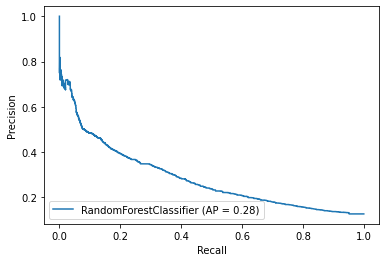

In [39]:
plot_precision_recall_curve(rf, X_test, y_test)

In [ ]:
rf_2 = RandomForestClassifier()

random_grid = {"max_depth": [3, 10, 100, None],
              "n_estimators": sp_randint(10, 100),
              "max_features": ["auto", "sqrt", "log2", None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

strat_shuffle_fold = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

cv_train = RandomizedSearchCV(rf_2, param_distributions=random_grid, cv=strat_shuffle_fold)
cv_train.fit(X_train, y_train)